<h1> Linear Regression Model. </h1>
<h2> In this notebook, I'll use a simple linear regression model to solve this 
<a href="https://github.com/jdwittenauer/ipython-notebooks/blob/master/exercises/ML/ex1.pdf">programming exercise</a> from Coursera. This notebook only include the food truck exercise, the house pricing i'll be including in another notebook. <h2/>

<h2> 1.Libraries </h2>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from math import sqrt
plt.style.use("Solarize_Light2")
%matplotlib inline

<h2> 3. Data Wrangling </h2>

In [2]:
path= "C:\\Users\\alexander.leite\\Downloads\\data_food_truck.txt"

In [3]:
Df_food = pd.read_csv(path, sep=",", header=None)
Df_food.columns = ['Size','Profit']

In [65]:
Df_food

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
5,8.3829,11.88600
6,7.4764,4.34830
7,8.5781,12.00000
8,6.4862,6.59870
9,5.0546,3.81660


In [66]:
Df_food.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<h2>2. Plotting de data </h2>

In [4]:
X = Df_food['Population']
y = Df_food['Profit']

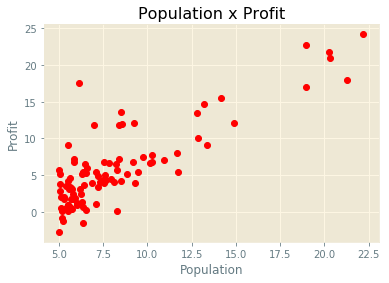

In [5]:
## Plot the data
plt.scatter(X, y,color='red')
plt.title('Population x Profit')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.yticks()
plt.show()

<h2>3. Pre Processing <h2/>

In [6]:
## I've tested before and scaling the data, provide a much better score to the model.
oScaler = preprocessing.StandardScaler().fit(Df_food[['Profit']])

In [7]:
Df_food['Profit'] = oScaler.transform(Df_food[['Profit']])

In [8]:
Df_food.describe()

,Population,Profit
count,97.000000,9.700000e+01
mean,8.159800,-1.236125e-16
std,3.869884,1.005195e+00
min,5.026900,-1.554208e+00
25%,5.707700,-7.027337e-01
50%,6.589400,-2.329232e-01
75%,8.578100,2.202868e-01
max,22.203000,3.339763e+00


<h2>4. Modelling </h2>

In [8]:
oLinearModel = linear_model.LinearRegression()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 123)

In [10]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [83]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(67, 1)
(30, 1)
(30,)
(67,)


In [84]:
oLinearModel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# Definindo x e y
observations = len(Df_food)
X = Df_food['Population'].values.reshape((observations,1)) 
X = np.column_stack((X,np.ones(observations))) 
y = Df_food['Profit'].values 

In [25]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [26]:
## Creating gradient descent to lower the cost function score
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

numpy.ndarray

In [73]:
lr =0.01
n_iter = 1200

theta = np.random.randn(2,1)


theta,cost_history,theta_history = gradient_descent(X,y.reshape(-1,1),theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          0.203,
Theta1:          -1.634
Final cost/MSE:  1419.042


In [74]:
oLinearModel.intercept_ = theta[1]
oLinearModel.coef_ = theta[0]

In [75]:
# print the intercept and coefficients
print(oLinearModel.intercept_)
print(oLinearModel.coef_)

[-1.63395965]
[0.20337994]


In [76]:
y_pred = oLinearModel.predict(X_test)
y_pred = y_pred.reshape(-1,1)

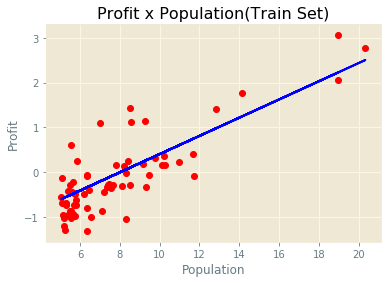

In [77]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,oLinearModel.predict(X_train),color='blue')
plt.title("Profit x Population(Train Set)")
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

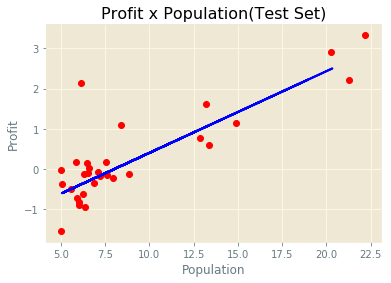

In [78]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,oLinearModel.predict(X_train),color='blue')
plt.title("Profit x Population(Test Set)")
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

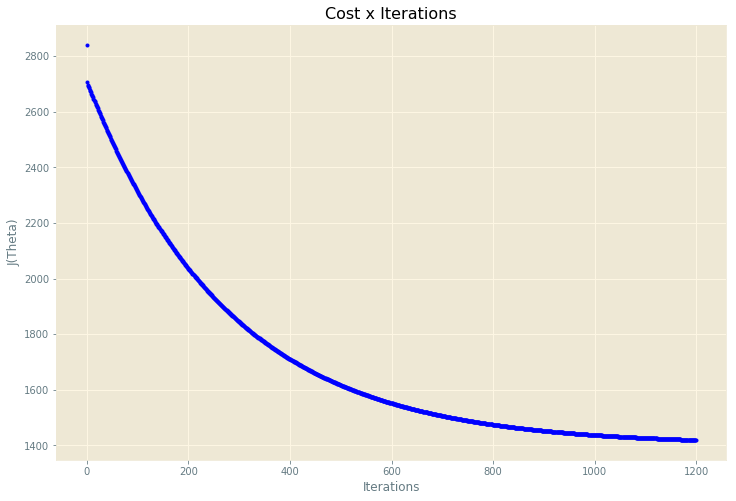

In [84]:
fig,ax = plt.subplots(figsize=(12,8))
plt.title("Cost x Iterations")
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

In [80]:
nRMS = np.sqrt(mean_squared_error(y_test,y_pred))

In [81]:
nRMS

0.6332643343066467

In [82]:
r2_score(y_test,y_pred)

0.6926112983301138